<a href="https://colab.research.google.com/github/Bor-Cherng/Bor-Cherng-SQL-Python-Projects/blob/main/Top_5000_Youtube_channel_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Read me!**

The reason I wanted to create this report is because YouTube has brought so much joy and variety into my life. It allows me not only to experience different lives but also to learn about different cultures! I feel that YouTube has greatly impacted my life, and whenever I have a moment, I can’t resist opening it to see what’s new. I hope YouTube brings you the same enjoyment! By the way, my favorite content to watch is **mukbangs**!

## **Introduction**

This dataset includes top 5000 Youtube channel, providing key metrics such as video uploads, subscribers and video views. These metrics serve as benchmarks for understanding what it takes to rank among the top channels.



## **Data Loading & Overview:**

First, I imported the necessary packages for **data loading, visualization, cleaning, and aggregation** as preparation.
To load and review the dataset, I started with **`pd.read_csv()`** to load the dataset into Colab. I then
used functions like **`head()`** and **`tail()`** to pinpoint the top 5 and last 5 rows. Lastly, I utilized **`shape`** to showcase the framework of the dataset, ensuring it was successfully loaded without any missing values.

In [2]:
# Loading, Visualization, Cleaning, and Aggregation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import dataset
df = pd.read_csv('top-5000-youtube-channels.csv')
df = pd.DataFrame(df)
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


## **Which YouTube channel is on fire right now ?**

In [4]:
# Who are the Top 5
df.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


## **What are the least popular YouTube channels ?**

In [5]:
# Who are the Last 5
df.tail(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


## **Dimensions of the Dataset (Rows, Columns)**

In [6]:
# (Rows, Columns) of dataset
df.shape

(5000, 6)

## **Data Information & Statistics:**

To gain a deeper understanding of the dataset, I used **`info()`** and **`describe()`** to inspect the column values, data types, and distribution.  This helped me **identify any missing values that need to be addressed, check for inconsistencies or anomalies in the data, and examine the range of values to understand their spread**. Additionally, the **`describe()`** function provided insights into key statistics such as the mean, standard deviation, minimum, and maximum values, which allowed me to **evaluate the overall distribution of numerical features and detect potential outliers**."



In [7]:
# Information of dataset: column name, null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [8]:
# Statistics of dataset: mean, std, min and max (the distribution of dataset)
df.describe(include = 'all')

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5.000000e+03
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.071449e+09
std,NaN,NaN,NaN,NaN,NaN,2.003844e+09
min,NaN,NaN,NaN,NaN,NaN,7.500000e+01
25%,NaN,NaN,NaN,NaN,NaN,1.862329e+08
50%,NaN,NaN,NaN,NaN,NaN,4.820548e+08
75%,NaN,NaN,NaN,NaN,NaN,1.124368e+09


## **Data Transformation & Cleaning:**

From the previous data analysis, we found that only the Video Views column has an integer data type, which means that Video Uploads and Subscribers cannot be analyzed directly using **`describe()`**. In order to quantify these data, I first checked how many values in the Video Uploads and Subscribers columns could not be converted into integers and found that they contained NULL values.

Specifically:

**There are 6 NULL values in the Video Uploads column;**

**There are 387 NULL values in the Subscribers column.**

Based on these results, I decided to **exclude these unconvertible or missing data** to ensure the accuracy and consistency of the subsequent analysis. This process will help ensure that the analysis is based on clean and quantifiable data for further research.

## **How many Null values after converting?**

In [9]:
df['Video Uploads']= pd.to_numeric(df['Video Uploads'], errors='coerce')
null_vu= df['Video Uploads'].isnull().sum()
df['Subscribers']= pd.to_numeric(df['Subscribers'], errors='coerce')
null_s= df['Subscribers'].isnull().sum()
print('NULl vales in Video Uploads:', null_vu)
print('NULl vales in Subscribers:', null_s)

NULl vales in Video Uploads: 6
NULl vales in Subscribers: 387


## **Check**

In [10]:
df.isnull().sum()

,0
Rank,0
Grade,0
Channel name,0
Video Uploads,6
Subscribers,387
Video views,0


## **Drop all the rows with null values**

In [11]:
df_new = df.dropna()

## **Check**

In [12]:
df_new.isnull().sum()

,0
Rank,0
Grade,0
Channel name,0
Video Uploads,0
Subscribers,0
Video views,0


## **Exploratory Data Analysis (EDA):**

In conducting data analysis, I aimed to understand **the impact of various metrics on ratings**. I explored each metric’s importance by examining its distribution in relation to the ratings, creating **strip plots** and **bubble charts** to assess the influence of video uploads, subscribers, and video views. I found that the number of video uploads does not have a direct positive correlation with higher ratings, unlike subscribers and video views. This observation aligns with reality—**sometimes, a single video can generate millions of views and attract a large following on its own.**

Additionally, the **correlation matrix** shows the relationships among Rank, Video Uploads, Subscribers, and Video Views. The results reveal a strong positive correlation (0.79) between Subscribers and Video Views, indicating that channels with more subscribers often have higher view counts. **Rank has a moderate negative correlation with Subscribers and Video Views (-0.38 and -0.40, respectively), suggesting that higher-ranked channels (lower Rank values) tend to have more subscribers and views.** Meanwhile, Video Uploads shows weak correlation with other variables, indicating that the number of uploads has minimal influence on subscribers and view counts.

<ipython-input-13-45a78bf910e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Grade', y='Video Uploads', data=df_new, palette='viridis', size=3, jitter=0.2)


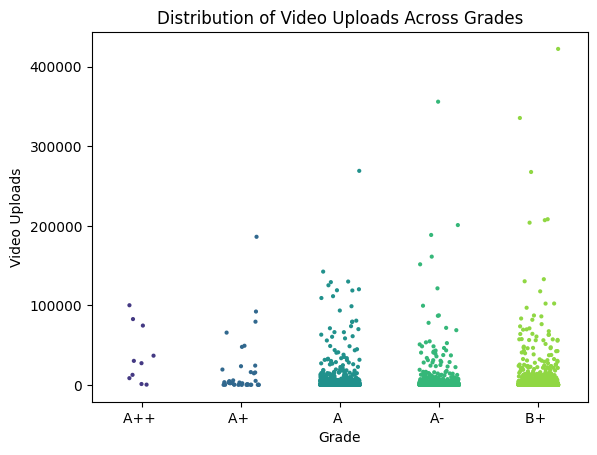

<ipython-input-13-45a78bf910e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Grade', y='Subscribers', data=df_new, palette='viridis', size=3, jitter=0.2)


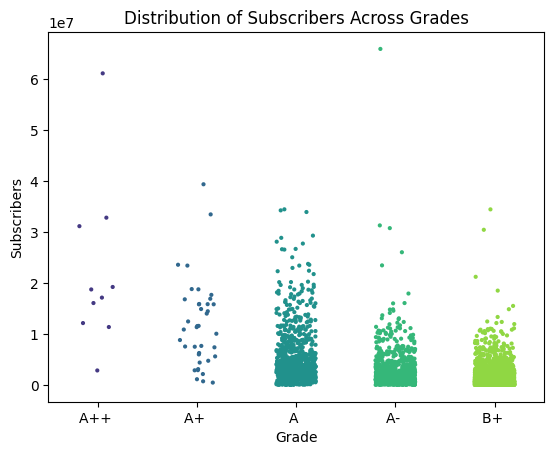

<ipython-input-13-45a78bf910e1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Grade', y='Video views', data=df_new, palette='viridis', size=3, jitter=0.2)


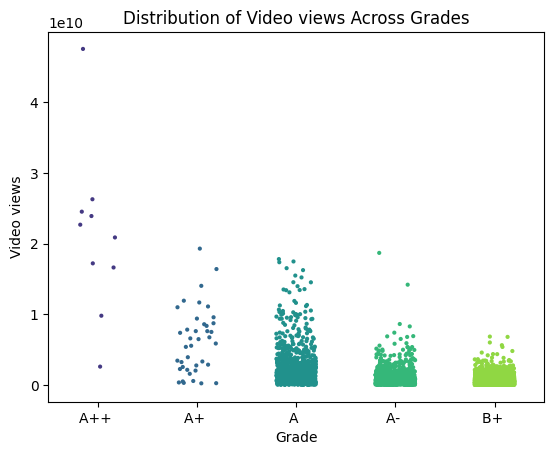

In [13]:
# Create the strip plot
sns.stripplot(x='Grade', y='Video Uploads', data=df_new, palette='viridis', size=3, jitter=0.2)
plt.title('Distribution of Video Uploads Across Grades')
plt.xlabel('Grade')
plt.ylabel('Video Uploads')
plt.show()

# Create the strip plot
sns.stripplot(x='Grade', y='Subscribers', data=df_new, palette='viridis', size=3, jitter=0.2)
plt.title('Distribution of Subscribers Across Grades')
plt.xlabel('Grade')
plt.ylabel('Subscribers')
plt.show()

# Create the strip plot
sns.stripplot(x='Grade', y='Video views', data=df_new, palette='viridis', size=3, jitter=0.2)
plt.title('Distribution of Video views Across Grades')
plt.xlabel('Grade')
plt.ylabel('Video views')
plt.show()

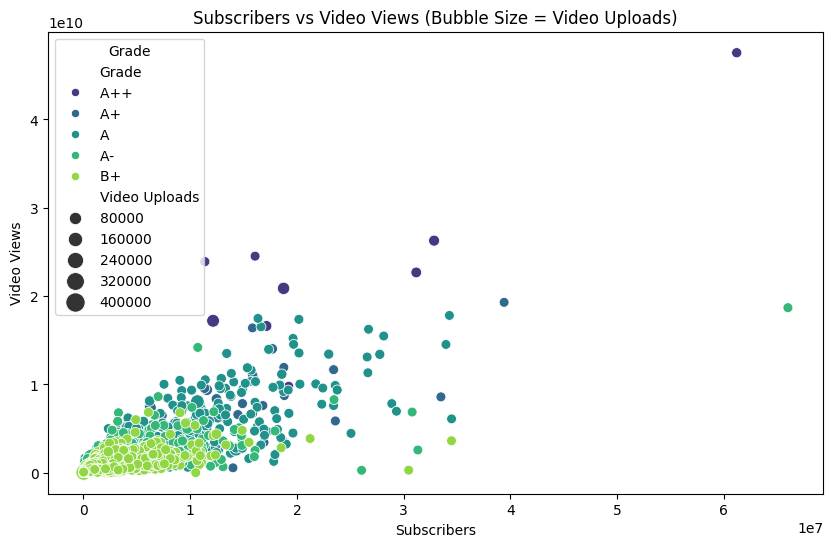

In [14]:
# Bubble chart: video views vs subscriptions (bubble size represents video uploads)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Video views', size='Video Uploads', hue='Grade', data=df_new, sizes=(50, 200), palette='viridis', legend='brief')
plt.title('Subscribers vs Video Views (Bubble Size = Video Uploads)')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.legend(title='Grade')
plt.show()


<ipython-input-15-16c3d7607190>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Rank'] = df_new['Rank'].replace({r'\D': '', ',': ''}, regex=True).astype(float)
<ipython-input-15-16c3d7607190>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Grade'] = df_new['Grade'].replace(grade_mapping)


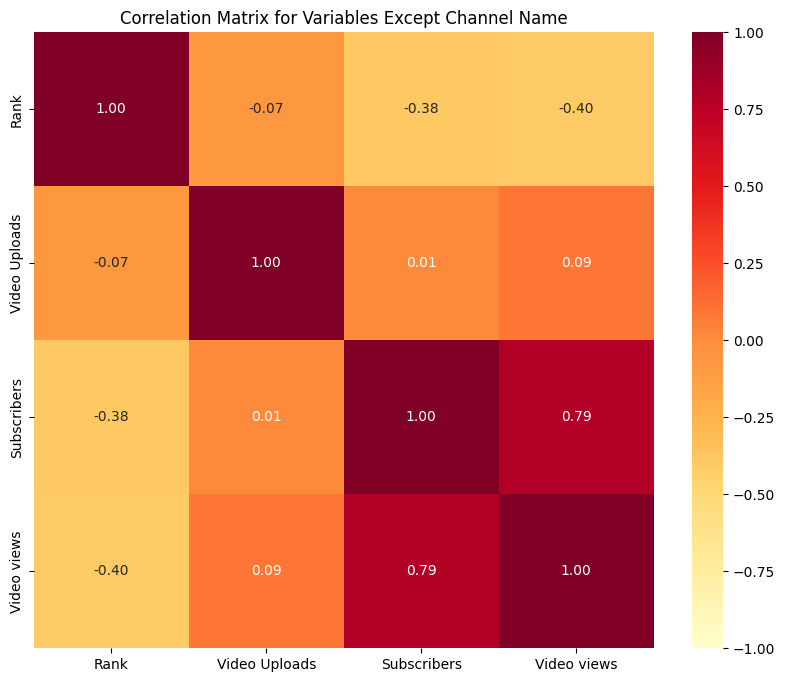

In [15]:
# Data transformation and feature engineering: Convert 'Rank' and 'Grade' to numeric values
# Clean the 'Rank' column by removing non-numeric characters and commas, then convert it to float
df_new['Rank'] = df_new['Rank'].replace({r'\D': '', ',': ''}, regex=True).astype(float)

# Define a mapping dictionary to convert 'Grade' column from letter grades to numeric values
grade_mapping = {'A++': 6, 'A+': 5, 'A': 4, 'A-': 3, 'B++': 2, 'B+':1}

# Replace the 'Grade' column values with their corresponding numeric values using the mapping dictionary
df_new['Grade'] = df_new['Grade'].replace(grade_mapping)

# Select only the numeric columns from the DataFrame for further analysis
numeric_df = df_new.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numeric columns
correlation_matrix = numeric_df.corr()

# Heat mapping
plt.figure(figsize=(10, 8)) # Resize the chart
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Matrix for Variables Except Channel Name')
plt.show()
